<a href="https://colab.research.google.com/github/AltamarMx/ai_fluidmechanics/blob/main/notebooks/003_my_third_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import matplotlib.tri as mtri

import numpy as np

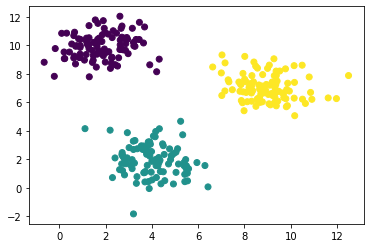

In [ ]:
points = 100

x1 = np.random.normal(loc=4,    size=points)
y1 = np.random.normal(loc=2.0,  size=points) 
x2 = np.random.normal(loc=9.0,  size=points)
y2 = np.random.normal(loc=7.0,  size=points)

x3 = np.random.normal(loc=2.0,  size=points)
y3 = np.random.normal(loc=10.0,  size=points)

x0 = np.array([[x,y1[i],0]  for i,x in enumerate(x1)])
x1 = np.array([[x,y2[i],1]  for i,x in enumerate(x2)])
x2 = np.array([[x,y3[i],-1] for i,x in enumerate(x3)])

x = np.append(x0,x1,axis=0)
x = np.append(x,x2,axis=0)
plt.scatter(x[:,0],x[:,1],c=x[:,2])


In [ ]:
x_train = x[:,:2]
y_train = x[:,2]

In [ ]:

model = keras.Sequential()

model.add(keras.Input(shape=2))
model.add(layers.Dense(5,activation='sigmoid',use_bias=True))
model.add(layers.Dense(5,activation='relu',use_bias=True))
model.add(layers.Dense(1,activation='tanh',use_bias=True))

In [ ]:
model.compile(loss='MSE',optimizer=keras.optimizers.Adam(learning_rate=0.03))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [ ]:
problem = model.fit(x_train,y_train,epochs=400,verbose=False)

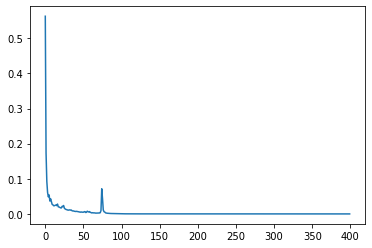

In [ ]:
plt.plot(problem.history['loss'])


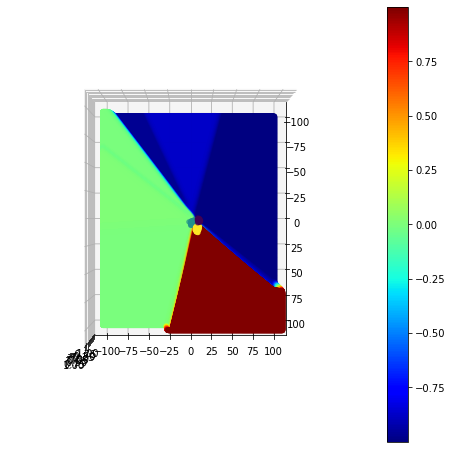

In [22]:
nx = 100
ny = 100
N  = 1000
xx = np.linspace(-nx,ny,N)
yy = np.linspace(-nx,ny,N)
X = np.array([[i,j] for i in xx for j in yy])


Z = model.predict(X)
Z = Z.flatten()

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

sc = ax.scatter(X[:,0], X[:,1], Z,c=Z,cmap="jet")
ax.scatter(x[:,0],x[:,1],x[:,2],c=x[:,2])
fig.colorbar(sc)
ax.view_init(90,0)
# ax.view_init(60,120)


# plt.show()